# Superstore Data analysis

# Step 1:import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2:import dataset

In [2]:
df=pd.read_excel(r"C:\Users\Paramita Sen\Downloads\Superstore_USA.xlsx\Superstore_USA.xlsx")

# Step 3:data clean & eda

In [3]:
df.head(3)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.64,7,49.92,88523


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [5]:
df.shape

(9426, 24)

In [6]:
df.describe()

,Row ID,Discount,Unit Price,Shipping Cost,Customer ID,Product Base Margin,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
count,9426.000000,9426.000000,9426.000000,9426.000000,9426.000000,9354.000000,9426.000000,9426,9426,9426.000000,9426.000000,9426.000000,9426.000000
mean,20241.015277,0.049628,88.303686,12.795142,1738.422236,0.512189,52446.327286,2012-03-05 18:33:59.465308672,2012-03-07 19:16:18.485041408,139.236410,13.798430,949.706272,82318.489073
min,2.000000,0.000000,0.990000,0.490000,2.000000,0.350000,1001.000000,2010-01-01 00:00:00,2010-01-02 00:00:00,-16476.838000,1.000000,1.320000,6.000000
25%,19330.250000,0.020000,6.480000,3.192500,898.000000,0.380000,29406.000000,2011-03-07 06:00:00,2011-03-09 00:00:00,-74.017375,5.000000,61.282500,86737.250000
50%,21686.500000,0.050000,20.990000,6.050000,1750.000000,0.520000,52302.000000,2012-04-08 00:00:00,2012-04-09 00:00:00,2.567600,10.000000,203.455000,88344.500000
75%,24042.750000,0.080000,85.990000,13.990000,2578.750000,0.590000,78516.000000,2013-03-26 00:00:00,2013-03-28 00:00:00,140.243850,17.000000,776.402500,89987.750000
max,26399.000000,0.250000,6783.020000,164.730000,3403.000000,0.850000,99362.000000,2013-12-31 00:00:00,2014-01-17 00:00:00,16332.414000,170.000000,100119.160000,91591.000000
std,6101.890965,0.031798,281.540982,17.181203,979.167197,0.135229,29374.597802,NaN,NaN,998.486483,15.107688,2598.019818,19149.448857


In [7]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [8]:
#fill all missing values of Product Base Margin 

In [9]:
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(),inplace=True)
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

# Step4:analyse column order priority(univariate analysis)

In [10]:
#find count of high priority orders

In [11]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [12]:
#remove the space in Critical
df['Order Priority']=df['Order Priority'].replace("Critical ","Critical")

In [13]:
df['Order Priority'].value_counts()

Order Priority
High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: count, dtype: int64

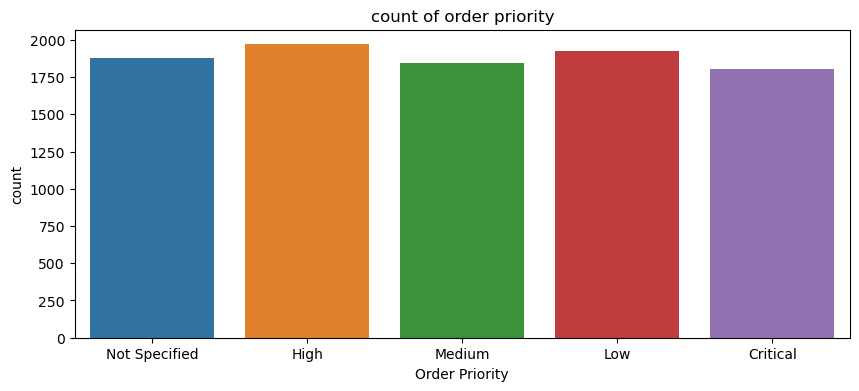

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(x='Order Priority',data=df)
plt.title("count of order priority")
plt.savefig("count of order priority.jpg")
plt.show()

# Step5:analyse column ship mode(univariate analysis)

In [15]:
df['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [16]:
x=df['Ship Mode'].value_counts().index
x

Index(['Regular Air', 'Delivery Truck', 'Express Air'], dtype='object', name='Ship Mode')

In [17]:
y=df['Ship Mode'].value_counts().values
y

array([7036, 1283, 1107], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

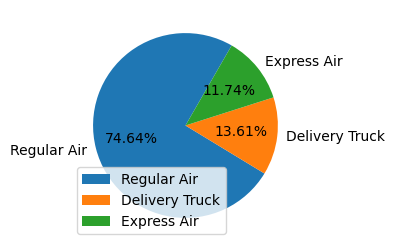

In [18]:
plt.figure(figsize=(5,3))
plt.pie(y,labels=x,startangle=60,autopct="%0.2f%%")
plt.legend(loc=3)
plt.show

# step 6:Analyze shiping mode of product with respect to their categories(biveriate analysis)

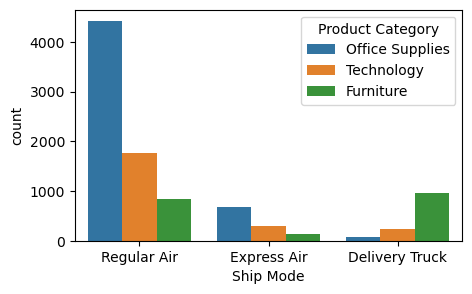

In [19]:
plt.figure(figsize=(5,3))
sns.countplot(x='Ship Mode',data=df,hue='Product Category')
plt.show()

# step7:understand customer segment using countplot

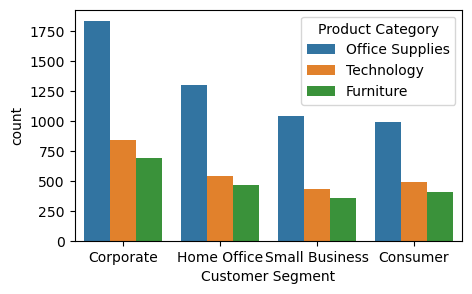

In [20]:
plt.figure(figsize=(5,3))
sns.countplot(x='Customer Segment',data=df,hue='Product Category')
plt.show()

# step 8:Analyze subcategories of product with respect to their categories(biveriate analysis)

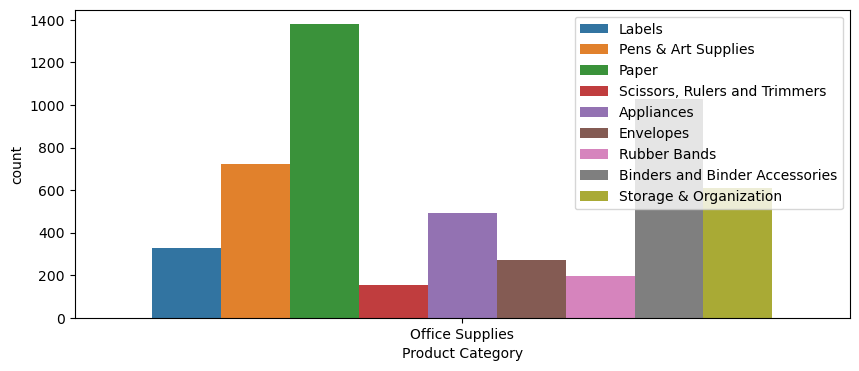

In [21]:
#for office supplies product category
plt.figure(figsize=(10,4))
sns.countplot(x='Product Category',data=df[df["Product Category"]=="Office Supplies"],hue='Product Sub-Category')
plt.legend(loc=1)
plt.show()

# step 9:analyze date

In [22]:
#create a new year column
df['Order year']=df['Order Date'].dt.year

In [23]:
df['Order year'].value_counts()

Order year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

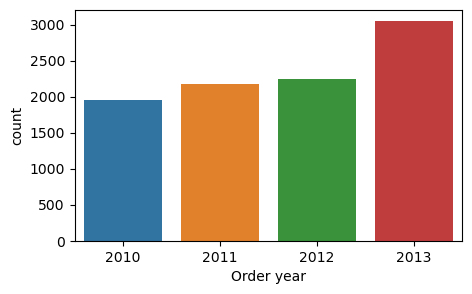

In [24]:
plt.figure(figsize=(5,3))
sns.countplot(x='Order year',data=df)
plt.show()

# step 10:analyze profit date

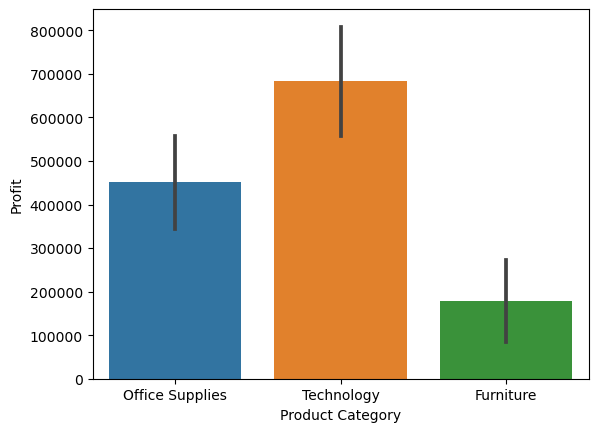

In [25]:
sns.barplot(x='Product Category',y='Profit',data=df,estimator='sum')
plt.show()

# step 11:Geo analysis based on sales

In [26]:
#top5 sales states
df['State or Province'].value_counts()[:5]

State or Province
California    1021
Texas          646
Illinois       584
New York       574
Florida        522
Name: count, dtype: int64

In [27]:
df.columns

Index(['Row ID', 'Order Priority', 'Discount', 'Unit Price', 'Shipping Cost',
       'Customer ID', 'Customer Name', 'Ship Mode', 'Customer Segment',
       'Product Category', 'Product Sub-Category', 'Product Container',
       'Product Name', 'Product Base Margin', 'Region', 'State or Province',
       'City', 'Postal Code', 'Order Date', 'Ship Date', 'Profit',
       'Quantity ordered new', 'Sales', 'Order ID', 'Order year'],
      dtype='object')

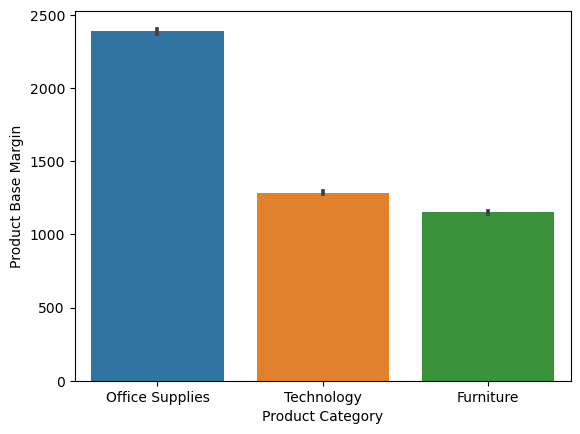

In [28]:
sns.barplot(x='Product Category',y='Product Base Margin',data=df,estimator='sum')
plt.show()

# Conclusions

In [29]:
#1. Order Priority Distribution
most customers opt for High shipping needs.

#2. Shipping Mode Preferences
Regular air is the most frequently used shipping mode.

#3. Shipping Mode vs Product Category
Office Supplies are shipped most frequently across all shipping modes.Furniture is shipped widely under office supplies.

#4. Customer Segments Insights
corporate segment is the largest customer base, followed by small business and Home Office.

#5. Product Sub-Category Insights
Within Office Supplies, sub-categories like Binders and Paper have the highest order volume.
Indicates high demand for frequently used consumables.

#6. Year-wise Order Trends
Orders have increased over the years (based on available data), indicating business growth.

#7. Profitability by Category
Technology yields the highest total profit.
Furniture has relatively lower profit margins, which may need strategic pricing or cost control.

#8. Regional Sales Performance
Top 5 states by sales volume are key markets. These could be targeted for further business development:-California,Texas,Illinois,New York,Florida

#9. Product Base Margin Insights
Office Supplies again leads with higher average base margins.Furniture have lower margins, reflecting their commodity-like nature.

SyntaxError: invalid syntax (2920754905.py, line 2)

# Recommendations

In [ ]:
###1. **Enhance High-Priority Order Handling**

#Insight: Most customers opt for high shipping needs.

Invest in logistics to support faster and more reliable high-priority deliveries.
Offer incentives (e.g., loyalty points or discounts) for selecting higher shipping tiers to drive revenue.

---

###2. **Optimize 'Regular Air' Shipping Mode**

#Insight: Regular air is the most frequently used shipping mode.

Negotiate bulk rates with shipping carriers** for air transport to reduce costs.
Ensure inventory planning aligns with the quick turnaround demands of air shipments.

---

###3. **Leverage Office Supplies as a Volume Driver**

#Insight: Office Supplies (especially Binders and Paper) ship most frequently.

Offer subscription models or bulk purchase discounts for high-usage items.
Bundle these with lower-performing sub-categories to increase overall basket size**.

---

###4. **Focus on Corporate and Small Business Segments**

#Insight: Corporate is the largest segment.

Develop customized corporate solutions (e.g., bulk invoicing, repeat order automation).
Target small businesses with starter packs or promotional pricing to encourage loyalty.

---

###5. **Revise Furniture Strategy**

#Insight: Furniture is widely shipped but has low margins.

Review pricing or sourcing strategies to improve profitability.
Position select furniture items as value-adds to high-margin tech purchases (e.g., office bundles).

---

###6. **Capitalize on Growth Trend**

#Insight: Orders are increasing yearly.

Increase marketing spend during high-growth quarters identified in historical data.
Scale operations to support sustained growth, including warehousing and customer support.

---

###7. **Expand Technology Offerings**

#Insight: Technology delivers the highest profits.

Introduce complementary tech accessories (e.g., cables, peripherals) to increase upselling.
Use profit contribution analysis to prioritize promotional spending on high-profit items.

---

###8. **Deepen Market Penetration in Top States**

#Insight: CA, TX, IL, NY, FL are top-performing states.

Launch geo-targeted ad campaigns and regional promotions.
Explore local partnerships or fulfillment centers** to boost service quality in these states.

---

###9. **Focus on High-Margin Office Supplies**

Insight: Office Supplies have higher base margins.

Promote these items more actively in email campaigns and website banners.
Explore private-label options for top-selling sub-categories to enhance brand control and margins.

---

# Thankyou